HELLO! 

This notebook contains my script for my certification in data analysis and visualisation course. 

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [2]:
df = pd.read_csv('data without infertility _final.csv')
df.sample(18)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42
379,380,10380,0,31,55.5,151.0,24.300000,15,74,18,...,1.0,0,110,80,6,7,18.0,22.0,9.0,NaN
76,77,10077,1,32,43.0,152.0,18.611496,13,80,20,...,1.0,0,120,70,4,4,10.5,10.5,12.8,NaN
197,198,10198,0,28,70.0,158.0,28.040378,15,72,18,...,1.0,0,110,80,5,7,12.0,14.0,9.0,NaN
23,24,10024,0,28,65.0,152.0,28.133657,13,74,22,...,0.0,0,110,80,6,8,14.0,18.0,8.5,NaN
134,135,10135,0,35,68.0,154.0,28.672626,15,72,18,...,0.0,0,120,80,3,4,18.0,17.0,9.0,NaN
238,239,10239,0,32,66.0,164.0,24.538965,15,72,18,...,1.0,1,120,80,5,5,17.0,19.0,9.0,NaN
280,281,10281,0,31,65.0,158.0,26.037494,15,72,18,...,0.0,1,120,70,3,3,18.0,15.0,8.9,NaN
511,512,10512,0,44,56.0,142.0,27.800000,13,72,18,...,0.0,0,110,80,9,5,19.0,19.0,6.0,NaN
412,413,10413,1,23,55.0,152.0,23.200000,13,78,18,...,0.0,1,110,70,10,18,14.0,14.0,10.3,NaN
159,160,10160,0,32,64.0,158.0,25.636917,15,73,18,...,0.0,0,110,80,5,7,11.0,12.0,9.5,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl. No                 541 non-null    int64  
 1   Patient File No.       541 non-null    int64  
 2   PCOS (Y/N)             541 non-null    int64  
 3    Age (yrs)             541 non-null    int64  
 4   Weight (Kg)            541 non-null    float64
 5   Height(Cm)             541 non-null    float64
 6   BMI                    541 non-null    float64
 7   Blood Group            541 non-null    int64  
 8   Pulse rate(bpm)        541 non-null    int64  
 9   RR (breaths/min)       541 non-null    int64  
 10  Hb(g/dl)               541 non-null    float64
 11  Cycle(R/I)             541 non-null    int64  
 12  Cycle length(days)     541 non-null    int64  
 13  Marraige Status (Yrs)  540 non-null    float64
 14  Pregnant(Y/N)          541 non-null    int64  
 15  No. of

In [4]:
df.shape

(541, 43)

In [5]:
df.isnull().sum()


Sl. No                     0
Patient File No.           0
PCOS (Y/N)                 0
 Age (yrs)                 0
Weight (Kg)                0
Height(Cm)                 0
BMI                        0
Blood Group                0
Pulse rate(bpm)            0
RR (breaths/min)           0
Hb(g/dl)                   0
Cycle(R/I)                 0
Cycle length(days)         0
Marraige Status (Yrs)      1
Pregnant(Y/N)              0
No. of aborptions          0
FSH(mIU/mL)                0
LH(mIU/mL)                 0
FSH/LH                     0
Hip(inch)                  0
Waist(inch)                0
Waist:Hip Ratio            0
TSH (mIU/L)                0
AMH(ng/mL)                 0
PRL(ng/mL)                 0
Vit D3 (ng/mL)             0
PRG(ng/mL)                 0
RBS(mg/dl)                 0
Weight gain(Y/N)           0
hair growth(Y/N)           0
Skin darkening (Y/N)       0
Hair loss(Y/N)             0
Pimples(Y/N)               0
Fast food (Y/N)            1
Reg.Exercise(Y

In [7]:
df.drop(columns= ['Unnamed: 42', 'TSH (mIU/L)'])

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,10001,0,28,44.6,152.000,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,10002,0,36,65.0,161.500,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,10003,1,33,68.8,165.000,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,10004,0,37,65.0,148.000,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,10005,0,25,52.0,161.000,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,10537,0,35,50.0,164.592,18.500000,17,72,16,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,10538,0,30,63.2,158.000,25.300000,15,72,18,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,10539,0,36,54.0,152.000,23.400000,13,74,20,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,10540,0,27,50.0,150.000,22.200000,15,74,20,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [8]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,10271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,10001.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,10136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,10271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,10406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,10541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
536    False
537    False
538    False
539    False
540    False
Length: 541, dtype: bool

In [9]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)', 'Unnamed: 42'],
      dtype='object')

In [12]:
df.rename(columns = {'No. of aborptions' : 'No. of abortions'}, inplace = True)


In [11]:
bins = list(range(20, int(df[' Age (yrs)'].max()) + 10, 10))
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

df['Age Group'] = pd.cut(df[' Age (yrs)'], bins=bins, labels=labels, right=False)
age_group_counts = df['Age Group'].value_counts().sort_index()

pcos_counts = df['PCOS (Y/N)'].value_counts()

print("Patients in each age group:")
print(age_group_counts)
print("\nPCOS vs Non-PCOS counts:")
print(pcos_counts)

Patients in each age group:
Age Group
20-29    214
30-39    282
40-49     45
Name: count, dtype: int64

PCOS vs Non-PCOS counts:
PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64


CASE STUDY 1: OBESITY

RESEARCH QUESTION: Is there an association between obesity status and PCOS diagnosis in women?

H0: There is no statistically significant association between obesity and PCOS in women

H1: There is a statistically significant association between obesity and PCOS in women


In [13]:
df['Body Adiposity']= ((df['Hip(inch)'] * 2.54) / ((df['Height(Cm) '] / 100) ** 1.5)) - 18
df['Waist to Height Ratio']= ((df['Waist(inch)']*2.54)/df['Height(Cm) '])

df['Obese'] = (
    (df['BMI'] > 30)&
    (df['Waist(inch)']> 31.5)&
    (df['Waist:Hip Ratio']>0.85)&
    (df['Body Adiposity']>39)&
    (df['Waist to Height Ratio']>0.5)
).astype(int)

number_of_obese_patients= df['Obese'].sum()
percentage_of_obese_patients= (number_of_obese_patients/len(df))*100
print(f"Total number of patients found with obesity is: {number_of_obese_patients}")
print(f"Percentage of obese patients: {percentage_of_obese_patients}")

df.sample(10)

Total number of patients found with obesity is: 13
Percentage of obese patients: 2.4029574861367835


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42,Age Group,Body Adiposity,Waist to Height Ratio,Obese
177,178,10178,1,24,89.0,173.0,29.737044,17,74,18,...,11,8,15.0,14.0,8.00,NaN,20-29,26.650318,0.513873,0
433,434,10434,0,33,57.0,163.0,21.500000,15,72,18,...,5,7,13.0,11.0,10.00,NaN,30-39,21.057306,0.436319,0
396,397,10397,0,31,68.0,161.0,26.200000,15,72,18,...,4,9,12.0,15.0,7.00,NaN,30-39,31.734172,0.583727,0
453,454,10454,1,35,57.0,154.0,24.000000,15,72,18,...,11,15,19.0,21.0,7.85,NaN,30-39,32.505216,0.527792,0
343,344,10344,0,25,85.0,161.0,32.800000,11,78,22,...,10,5,15.0,17.0,8.00,NaN,20-29,34.220881,0.599503,0
156,157,10157,0,27,53.2,158.0,21.300000,13,72,22,...,5,7,11.0,13.0,11.00,NaN,20-29,29.320553,0.514430,0
104,105,10105,0,29,60.0,159.0,23.733238,13,72,18,...,11,12,18.0,20.0,7.00,NaN,20-29,31.408610,0.511195,0
470,471,10471,1,34,52.0,149.0,23.400000,13,80,20,...,8,10,17.0,20.0,7.00,NaN,30-39,32.275548,0.545503,0
490,491,10491,0,35,61.0,154.0,25.700000,12,80,20,...,3,2,19.0,16.0,6.00,NaN,30-39,35.163385,0.626753,0
61,62,10062,1,32,76.0,161.0,29.319856,15,78,22,...,9,12,14.0,13.0,7.80,NaN,30-39,37.950944,0.615280,0


In [14]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Obese'], df['PCOS (Y/N)'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Cramér's V: {cramers_v}")

Chi-square statistic: 3.7743454648757355
P-value: 0.05204425929809511
Cramér's V: 0.08352609767238375


The P-Value obtained from the analysis shows that there is no statistically significant association between PCOS and obesity. Hence we fail to reject the null hypothesis. The Crammer's V dome to confirm just how weak the association is shows that there is a negligible association between obesity and PCOS in women. This further accertains that we fail to reject the null hypothesis. Obesity alone is not a strong predictor for PCOS and would probably need to be combined with other variables to improve predictive accuracy. 

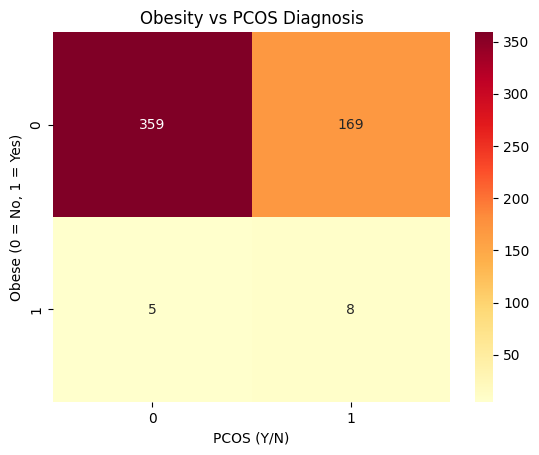

In [15]:
contingency_table = pd.crosstab(df['Obese'], df['PCOS (Y/N)'])

sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Obesity vs PCOS Diagnosis")
plt.xlabel("PCOS (Y/N)")
plt.ylabel("Obese (0 = No, 1 = Yes)")
plt.show()

CASE STUDY 2: EXERCISE IN PCOS NON-OBESE PATIENTS

RESEARCH QUESTION: Does regular exercise modify the association between obesity and PCOS?

H0: There is no effect modification by regular exercise on the obesity-PCOS association

H1: Regular exercise modifies the obesity-PCOS association

In [16]:
pcos_not_obese = df[(df['PCOS (Y/N)'] == 1) & (df['Obese'] == 0)]

exercise_counts = pcos_not_obese['Reg.Exercise(Y/N)'].value_counts()

print("Number of PCOS patients (not obese) who exercise vs don't exercise:")
print(exercise_counts)

exercise_percent = pcos_not_obese['Reg.Exercise(Y/N)'].value_counts(normalize=True) * 100
print("\nPercentage breakdown:")
print(exercise_percent)

Number of PCOS patients (not obese) who exercise vs don't exercise:
Reg.Exercise(Y/N)
0    120
1     49
Name: count, dtype: int64

Percentage breakdown:
Reg.Exercise(Y/N)
0    71.005917
1    28.994083
Name: proportion, dtype: float64


In [17]:
contigency_table = pd.crosstab(
    pcos_not_obese['Reg.Exercise(Y/N)'],
    pcos_not_obese['Reg.Exercise(Y/N)']
)

chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

print(f"Chi-square Statistic: {chi2}")
print(f"P-Value: {p}")

Chi-square Statistic: 164.17758868555921
P-Value: 1.383459861900374e-37


Evidently, the p-value shows that there is extremely strong statistical evidence that exercise habits are associated with PCOS diagnosis in the non-obese group 

/var/folders/pw/bp5fcv1j5hs4z59shjzs378w0000gn/T/ipykernel_2439/44327089.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


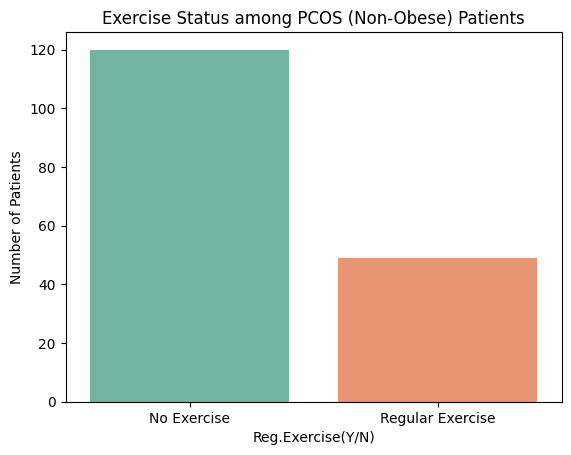

In [18]:
sns.countplot(
    data=pcos_not_obese,
    x='Reg.Exercise(Y/N)',
    palette='Set2'
)
plt.title('Exercise Status among PCOS (Non-Obese) Patients')
plt.xticks([0, 1], ['No Exercise', 'Regular Exercise'])
plt.ylabel('Number of Patients')
plt.show()

CASE STUDY 3: HORMONE LEVELS

RESEARCH QUESTION: Can hormones levels(alone or in a specific combination) accurately differentiate women with PCOS from those without?

H0:The level of hormones has no diagnostic ability to distinguish patients with PCOS from those without.

H1: The level of hormones has a diagnostic effect to distinguish patients with PCOS from those without.

In [19]:
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')
print(df['AMH(ng/mL)'].isna().sum())

1


In [20]:
df['LH/FSH Ratio']= (df['LH(mIU/mL)']/df['FSH(mIU/mL)'])
df['PCOS hormone indicator']=(
    (df['LH/FSH Ratio']>1.0).astype(int)+
    (df['PRG(ng/mL)']<5).astype(int)+
    (df['AMH(ng/mL)']>3.15).astype(int) >= 2
).astype(int)

contigency_table = pd.crosstab(df['PCOS hormone indicator'], df['PCOS (Y/N)'])
chi2, p, dof, expected = chi2_contingency(contigency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-Value: {p}")

Chi-square statistic: 25.26326708392059
P-Value: 5.001435433556822e-07


The p_value indicates that there's strong statistical evidence that the PCOS hormone indicator is associated with an actual PCOS diagnosis. 

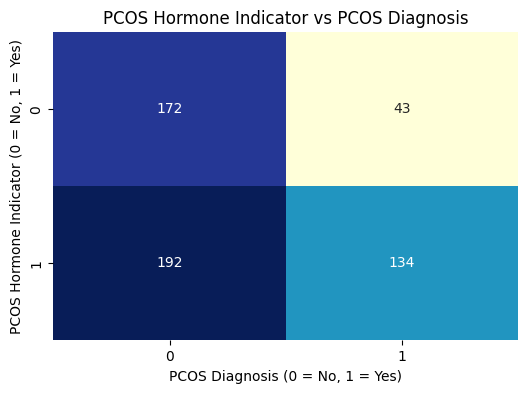

In [21]:
contingency_table = pd.crosstab(df['PCOS hormone indicator'], df['PCOS (Y/N)'])

plt.figure(figsize=(6,4))
sns.heatmap(
    contingency_table,
    annot=True,        
    fmt="d",        
    cmap="YlGnBu",   
    cbar=False
)

plt.title("PCOS Hormone Indicator vs PCOS Diagnosis")
plt.xlabel("PCOS Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("PCOS Hormone Indicator (0 = No, 1 = Yes)")
plt.show()

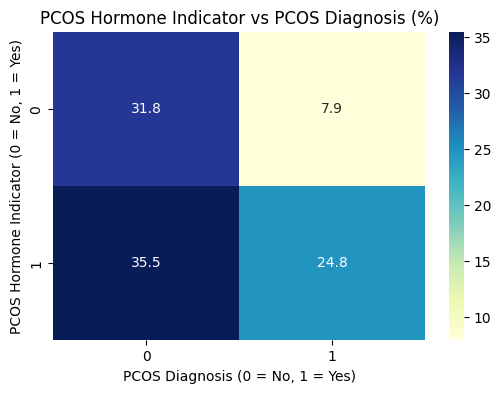

In [22]:
contingency_table = pd.crosstab(df['PCOS hormone indicator'], df['PCOS (Y/N)'])

contingency_percent = contingency_table / contingency_table.values.sum() * 100

plt.figure(figsize=(6,4))
sns.heatmap(
    contingency_percent,
    annot=True,        
    fmt=".1f",        
    cmap="YlGnBu",
    cbar=True
)

plt.title("PCOS Hormone Indicator vs PCOS Diagnosis (%)")
plt.xlabel("PCOS Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("PCOS Hormone Indicator (0 = No, 1 = Yes)")
plt.show()

CASE STUDY 4: JUSTIFYING THE ROTTERDAM CRITERION FOR PCOS DIAGNOSIS

RESEARCH QUESTION: Is the Rotterdam criterion accurate in predicting PCOS? 

NOTE: The Rotterdam Criterion utilised to diagnose PCOS uses biochemical and clinical markers to check for presence of PCOS i.e. anovulation-checked using irregularity of period and cycle length; hyperandrogenism-assessed using clinical markers like hirsutism, acne and adrogenic alopecia, and biochemical markers like elevated androgens; and finally, polycystic ovarian morphology which is confirmed by checking the number of follicles in each ovary, and the ovarian volume. At least 2 out of 3 must be present for a PCOS diagnosis. All other causes are excluded before applying Rotterdam criteria

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

df['MenstrualIrregularity'] = (df['Cycle(R/I)'] == 4).astype(int)

df['Hyperandrogenism'] = df[['hair growth(Y/N)', 'Pimples(Y/N)', 'Skin darkening (Y/N)']].apply(
    lambda row: 1 if any(val == 'Y' for val in row) else 0, axis=1
)
df['PolycysticOvaries'] = ((df['Follicle No. (L)'] >= 12) | (df['Follicle No. (R)'] >= 12)).astype(int)
df['Rotterdam_Score'] = df['MenstrualIrregularity'] + df['Hyperandrogenism'] + df['PolycysticOvaries']
df['Rotterdam_Prediction'] = (df['Rotterdam_Score'] >= 2).astype(int)

y_true = df['PCOS (Y/N)']  
y_pred = df['Rotterdam_Prediction']

conf_mat = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Confusion Matrix:\n", conf_mat)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
 [[362   2]
 [127  50]]
Accuracy: 0.76
Precision: 0.96
Recall (Sensitivity): 0.28
F1 Score: 0.44


It's clear now that the Rotterdam Criterion is an ELIMINATION CRITERION. It works well to exclude false positives as opposed to also thoroughly checking to include true positives. It is correct 96% of the time (when this dataset is used) with very few false positives. On the sensitivity aspect, the criterion identifies 28% of the people who actually have PCOS, meaning 72% of actual PCOS cases are being missed-which is evident in the high number of false negatives. 

In [24]:
TN, FP, FN, TP = 362, 2, 127, 50 #(True negatives, false positives, false negatives, true positives)

# Specificity and False Positive Rate
specificity = TN / (TN + FP)

fpr = FP / (FP + TN)

print(f"Specificity: {specificity:.2f}")
print(f"False Positive Rate (FPR): {fpr:.2f}")

Specificity: 0.99
False Positive Rate (FPR): 0.01


Question: If we add clinical and biochemical markers, will it improve the sensitivity of the Criterion while still keeping specificity high? 

In [25]:
from sklearn.linear_model import LinearRegression

# Isolation using Rotterdam
df['rotterdam_positive'] = (
    (df['Cycle(R/I)'] == 4).astype(int) + 
    (df['Follicle No. (L)'] >= 12).astype(int) +
    (df['Follicle No. (R)'] >= 12).astype(int)
) >= 2

df_rotterdam = df[df['rotterdam_positive'] == True].copy()

# Rotterdam criterion + Multi Linear Regression
#Features to be used in the regression model
features = [
    ' Age (yrs)', 'BMI', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'AMH(ng/mL)',
    'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)',
    'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 
    'Avg. F size (R) (mm)', 'Endometrium (mm)'
]
target = 'PCOS (Y/N)'

X = df_rotterdam[features]
y = df_rotterdam[target]


# Split data into Train (80%) & Test (20%) 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Training the Multiple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

#Let's use the Test data to predict
y_pred_scores = model.predict(X_test)
y_pred_binary = (y_pred_scores >= 0.5).astype(int)


cm = confusion_matrix(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"Specificity: {specificity:.2f}")

Confusion Matrix:
 [[ 0  3]
 [ 0 12]]
Accuracy: 0.80
Precision: 0.80
Recall (Sensitivity): 1.00
Specificity: 0.00


The results shows that the M.L.R model never correctly predicted patients without PCOS and all of the non-PCOS cases were wrongly flagged as PCOS cases. All the actual PCOS cases and positives were captured. Issue now is at the specificity. It completely fails at ruling out the non-PCOS cases. A better model could be applied but unfortunately, that's beyond my scope of knowledge currently. 🤗

CASE STUDY 5: RISK FACTORS

RESEARCH QUESTION: Which patients have risk factors associated with PCOS? 

In [26]:
df['PRL_mild'] = (df['PRL(ng/mL)'] > 25).astype(int)
df['PRL_marked'] = (df['PRL(ng/mL)'] >= 50).astype(int)
df['VitD3 deficiency'] = (df['Vit D3 (ng/mL)'] < 20).astype(int)
df['PostMenopause'] = (df[' Age (yrs)'] >= 51).astype(int)
df['Endometrial Hyperplasia risk'] = ((df['PostMenopause'] & (df['Endometrium (mm)'] > 12)) |
                      ((1 - df['PostMenopause']) & (df['Endometrium (mm)'] > 11))).astype(int)

df['Risk Count'] = df[['PRL_mild', 'VitD3 deficiency', 'Endometrial Hyperplasia risk']].sum(axis=1)
df['Any Risk'] = (df['Risk Count'] > 0).astype(int)

print("Mild hyperprolactinemia:", df['PRL_mild'].sum())
print("Marked hyperprolactinemia:", df['PRL_marked'].sum())
print("Vitamin D deficiency:", df['VitD3 deficiency'].sum())
print("Endometrium risk:", df['Endometrial Hyperplasia risk'].sum())
print("Any risk:", df['Any Risk'].sum(), f"({df['Any Risk'].mean()*100:.1f}%)")

for i in range(1, 4):
    count = (df['Risk Count'] == i).sum()
    print(f"Patients with {i} risk(s): {count}")

df[df['Risk Count'] >= 2].to_csv("multi_risk_patients.csv", index=False)

df1= pd.read_csv("multi_risk_patients.csv")
df1[['Patient File No.','PCOS (Y/N)' ,'PRL_mild', 'VitD3 deficiency', 'Endometrial Hyperplasia risk']].sample(5)

Mild hyperprolactinemia: 208
Marked hyperprolactinemia: 23
Vitamin D deficiency: 119
Endometrium risk: 45
Any risk: 309 (57.1%)
Patients with 1 risk(s): 249
Patients with 2 risk(s): 57
Patients with 3 risk(s): 3


,Patient File No.,PCOS (Y/N),PRL_mild,VitD3 deficiency,Endometrial Hyperplasia risk
54,10472,1,1,1,0
28,10231,1,1,0,1
58,10532,0,1,1,0
34,10270,1,1,0,1
50,10429,1,1,0,1


In [27]:
max_risk_count = df['Risk Count'].max()

max_risk_patients = df[df['Risk Count'] == max_risk_count].copy()
print(f"Patients with maximum risk count ({max_risk_count})")
print("=" * 60)

for idx, patient in max_risk_patients.iterrows():
    print(f"\nPatient File No.: {patient['Patient File No.']}")
    print(f"PCOS Status: {patient['PCOS (Y/N)']}")
    print(f"Risk Count: {patient['Risk Count']}")
    print(f"Risks - PRL_mild: {patient['PRL_mild']}, VitD3 deficiency: {patient['VitD3 deficiency']}, Endometrial Risk: {patient['Endometrial Hyperplasia risk']}")
    print(f"Details - PRL: {patient['PRL(ng/mL)']} ng/mL, Vit D3: {patient['Vit D3 (ng/mL)']} ng/mL, Endometrium: {patient['Endometrium (mm)']} mm")
    print("-" * 40)

print(f"\nTotal patients with maximum risk count: {len(max_risk_patients)}")

Patients with maximum risk count (3)

Patient File No.: 10126
PCOS Status: 0
Risk Count: 3
Risks - PRL_mild: 1, VitD3 deficiency: 1, Endometrial Risk: 1
Details - PRL: 33.51 ng/mL, Vit D3: 13.5 ng/mL, Endometrium: 12.0 mm
----------------------------------------

Patient File No.: 10190
PCOS Status: 1
Risk Count: 3
Risks - PRL_mild: 1, VitD3 deficiency: 1, Endometrial Risk: 1
Details - PRL: 25.35 ng/mL, Vit D3: 8.6 ng/mL, Endometrium: 13.0 mm
----------------------------------------

Patient File No.: 10249
PCOS Status: 1
Risk Count: 3
Risks - PRL_mild: 1, VitD3 deficiency: 1, Endometrial Risk: 1
Details - PRL: 111.74 ng/mL, Vit D3: 12.8 ng/mL, Endometrium: 12.0 mm
----------------------------------------

Total patients with maximum risk count: 3


CASE STUDY 6: MIS-DIAGNOSIS

PCOS is often mis-diagnosed for other illnesses and issues due to the overlap of symptoms and the lack of a single definitive test for PCOS. Additionally, some of these illness mimic PCOS further complicating accurate diagnosis. 

NOTE: The mapping of specific biomarkers to each differential diagnosis is complex as it relies on clinical judgement and often requires tests that are not included in this dataset. Therefore, this is just for demostration purposes on what I've learnt during the course of my data analysis learning, rather than accurate reporting of factual information. My data is limited but my knowledge can still be showcased. 🤗

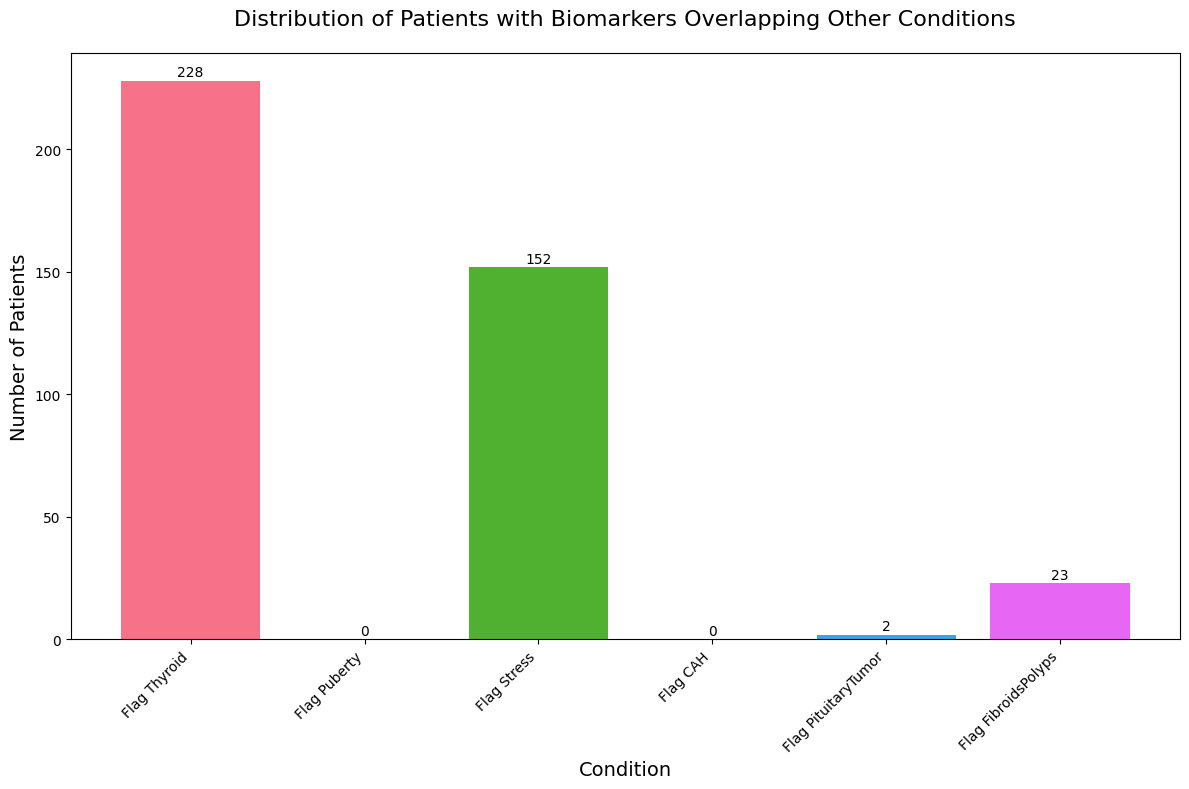

In [28]:
#The columns are labelled flag to remind that this is simply to flag the patients with the probability of falling into these categories. Not to diagnose them with it. 

df['Flag Thyroid'] = ((df['PRL(ng/mL)'] > 25) | ((df['BMI'] > 30) & (df['Hair loss(Y/N)'] == 1))).astype(int)
df['Flag Puberty'] = ((df[' Age (yrs)'] < 18) & (df['MenstrualIrregularity'] == 1)).astype(int)
df['Flag Stress'] = ((df['PRL(ng/mL)'] > 25) & (df['Reg.Exercise(Y/N)'] == 0)).astype(int)
df['Flag CAH'] = (df['Hyperandrogenism'] == 1).astype(int)  #CAH refers to congenital adrenal hyperplasia
df['Flag PituitaryTumor'] = (df['PRL(ng/mL)'] > 100).astype(int)
df['Flag FibroidsPolyps'] = (df['Endometrium (mm)'] > 12).astype(int)

flag_columns = [col for col in df.columns if col.startswith('Flag')]
flag_counts = df[flag_columns].sum()
plot_df = flag_counts.reset_index()
plot_df.columns = ['Condition', 'Count']
plot_df['Condition'] = plot_df['Condition'].str.replace('Flag_', '')

plt.figure(figsize=(12, 8))
bars = plt.bar(plot_df['Condition'], plot_df['Count'], color=sns.color_palette("husl", len(plot_df)))
plt.title('Distribution of Patients with Biomarkers Overlapping Other Conditions', fontsize=16, pad=20)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Our analysis so far has been able to sufficiently show the relationship between PCOS diagnosis and various lifestyle and biological factors. 
It has also shown that the Rotterdam Criterion, despite its problem areas, it works well to isolate PCOS patients by thoroughly eliminating those without. 
Nonetheless, a better model for prediction of PCOS can be developed to aid healthcare professionals in their assessment. This model would further help in reducing misdiagnosis, identifying risk factors, and support medical professionals in properly advising patients on how to better their health post diagnosis.
